# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather}&units={units}&q="

In [7]:
# Creating lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: rikitea, City ID: 4030556
City Name: bredasdorp, City ID: 1015776
City Name: mataura, City ID: 6201424
City Name: ancud, City ID: 3899695
City Name: nanortalik, City ID: 3421765
That record does not exist, searching for next record...
City Name: sisimiut, City ID: 3419842
City Name: qaanaaq, City ID: 3831208
City Name: itarema, City ID: 3393692
City Name: foam lake, City ID: 5955084
City Name: georgetown, City ID: 1735106
City Name: balykshi, City ID: 610445
City Name: nouadhibou, City ID: 2377457
City Name: tromso, City ID: 6453316
That record does not exist, searching for next record...
City Name: te anau, City ID: 2181625
City Name: lompoc, City ID: 5367788
City Name: tuatapere, City ID: 2180815
City Name: new norfolk, City ID: 2155415
City Name: mitsamiouli, City ID: 921786
That record does not exist, searching for next record...
City Name: hermanus, City ID: 3366880
City Name: punta arenas, City ID: 3874787
City Name: chokurdakh, City ID: 2126123
City Name: naghalin, Ci

City Name: dikson, City ID: 1507390
City Name: giddalur, City ID: 1271213
City Name: terme, City ID: 738803
That record does not exist, searching for next record...
City Name: broome, City ID: 5110365
City Name: inongo, City ID: 2315417
City Name: okaihau, City ID: 2185786
City Name: ilulissat, City ID: 3423146
City Name: nabire, City ID: 1634614
City Name: viedma, City ID: 3832899
That record does not exist, searching for next record...
City Name: porto novo, City ID: 2392087
City Name: avarua, City ID: 4035715
City Name: mogadishu, City ID: 53654
City Name: arlit, City ID: 2447513
City Name: ozernovskiy, City ID: 2122293
City Name: buala, City ID: 2109528
City Name: port elizabeth, City ID: 964420
City Name: shizunai, City ID: 2128025
That record does not exist, searching for next record...
City Name: karaton, City ID: 1630058
City Name: mathbaria, City ID: 1185239
City Name: alyangula, City ID: 2079582
City Name: chake chake, City ID: 160677
City Name: misratah, City ID: 2214846
Cit

City Name: cap malheureux, City ID: 934649
City Name: rawah, City ID: 92004
City Name: jizan, City ID: 105298
City Name: temyasovo, City ID: 483650
City Name: constantine, City ID: 2501152
City Name: kapoeta, City ID: 372884
City Name: padang, City ID: 1633419
City Name: nauta, City ID: 3692020
City Name: kokorevka, City ID: 546633
City Name: akdepe, City ID: 601551
City Name: punto fijo, City ID: 3629576
City Name: ust-nera, City ID: 2120048
City Name: isangel, City ID: 2136825
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: bathsheba, City ID: 3374083
City Name: naberera, City ID: 152042
City Name: verkh-usugli, City ID: 2013459
City Name: sibolga, City ID: 1213855
That record does not exist, searching for next record...
City Name: nesbyen, City ID: 3144733
City Name: oranjestad, City ID: 3577154
City Name: northam, City ID: 2641434
City Name: weligama, City ID: 1223738
City Name: sitka, City ID: 5557293
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})

cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4030556,Rikitea,PF,-23.1203,-134.9692,78.96,72,27,7.61
1,1015776,Bredasdorp,ZA,-34.5322,20.0403,53.60,87,66,3.44
2,6201424,Mataura,NZ,-46.1927,168.8643,50.67,91,100,11.30
3,3899695,Ancud,CL,-41.8697,-73.8203,59.00,80,0,1.32
4,3421765,Nanortalik,GL,60.1432,-45.2371,25.61,87,4,17.49


In [10]:
# Export to .csv file
cities_df.to_csv("city_weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

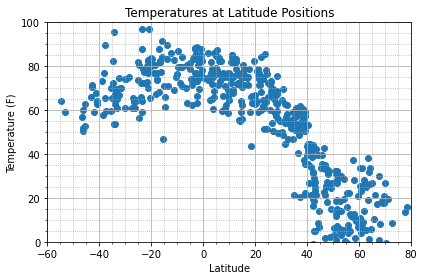

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

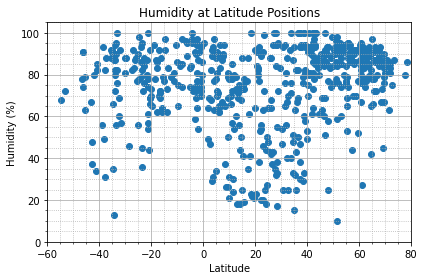

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

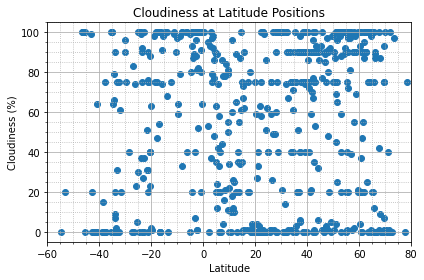

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

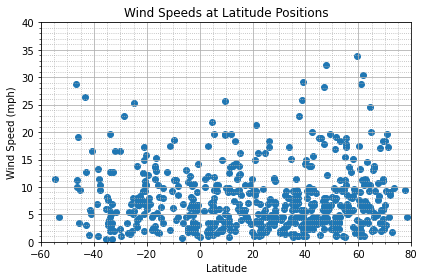

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = linregress.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

AttributeError: 'function' object has no attribute 'pearsonr'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression